Problem Statement: Group customers as per their the Annual Income and Spending Score 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
# Here there is no label provided 
# work on Annual Income (k$) and Spending Score (1-100)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#check for null value 
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

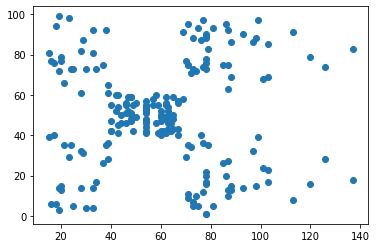

In [10]:
#Do EDA 
#from data points we can say there will be 5 clusters 
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [11]:
X=df[['Annual Income (k$)','Spending Score (1-100)','Age']].values

In [12]:
from sklearn.cluster import KMeans

In [13]:
#SELECT CULTSER SIZE AS 5 ; Default is 8 ; check with signature Shift + tab
model=KMeans(n_clusters=6,random_state=0)

In [14]:
model.fit(X)

KMeans(n_clusters=6, random_state=0)

In [15]:
y=model.predict(X)

In [16]:
#check clusters as ouputput ; It is showing cluser numbers ; cluster numbers starts from 0 ie 0 to 4 
y

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [17]:
#check number of values or data points  in each cluster 
#output shows at 0th cluster there are 35 data points, at 1st cluster 81 and so on 
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([38, 45, 35, 39, 22, 21], dtype=int64))

In [18]:
np.sum([35, 81, 39, 22, 23])
#df.shape

200

In [19]:
df.shape

(200, 5)

In [20]:
#check for first cluster how many from 0th columns ie Annual Income (k$) 
X[y==0,0]

array([39, 40, 40, 40, 42, 43, 46, 46, 48, 48, 48, 54, 54, 54, 54, 54, 57,
       58, 59, 60, 60, 60, 60, 61, 62, 62, 62, 63, 64, 64, 65, 65, 67, 67,
       69, 70, 72, 76], dtype=int64)

In [21]:
#check how many from 1st columns ie Spending Score (1-100) 
X[y==0,1]

array([61, 47, 42, 42, 60, 54, 51, 55, 59, 59, 47, 54, 48, 52, 55, 57, 55,
       60, 41, 40, 42, 52, 50, 49, 41, 55, 42, 54, 42, 46, 48, 50, 56, 40,
       58, 29, 34, 40], dtype=int64)

In [22]:
#check for 4th cluser how many from 0th columns ie Annual Income (k$) 
X[y==3,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

In [23]:
#check for 4th cluser how many from 0th columns ie Spending Score (1-100)
X[y==3,1]

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

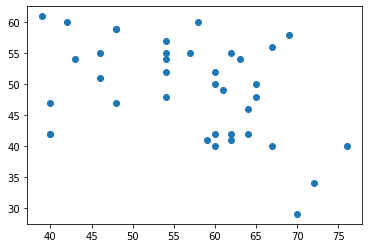

In [24]:
#show data points of 1st cluster with Annual Income (k$) and Spending Score (1-100)
plt.scatter(X[y==0,0],X[y==0,1])

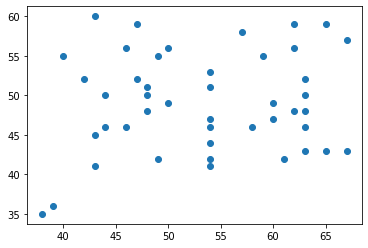

In [25]:
#show data points of 2nd  cluster with Annual Income (k$) and Spending Score (1-100)
plt.scatter(X[y==1,0],X[y==1,1])

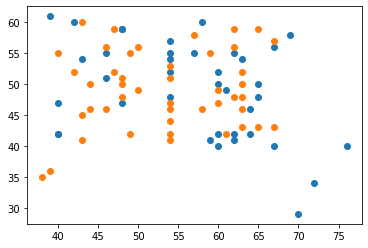

In [26]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

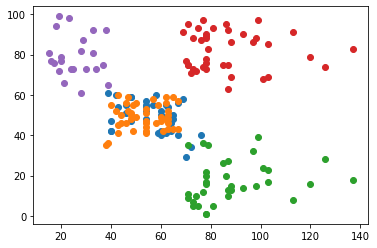

In [27]:
#show clusters combine
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])

In [28]:
# assignment change the value of cluters to 6 ie model=KMeans(n_clusters=6,random_state=0)

In [29]:
#show cluster centers or centroid for Annual Income (k$) and Spending Score (1-100)
model.cluster_centers_

array([[56.65789474, 49.13157895, 27.        ],
       [53.37777778, 49.08888889, 56.15555556],
       [88.22857143, 17.28571429, 41.68571429],
       [86.53846154, 82.12820513, 32.69230769],
       [25.72727273, 79.36363636, 25.27272727],
       [25.14285714, 19.52380952, 44.14285714]])

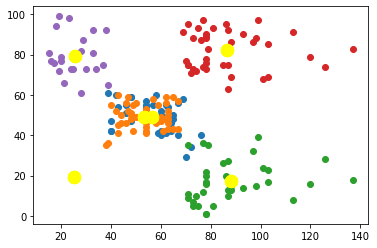

In [30]:
#show clusters combine ; s is usied for size ;s=150
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow')

In [31]:
#sklearn.metrics.silhouette_score  as metic 
#-	silhouette score is between -1 to 1
# if silhouette score  is near to the -1 mean sprawling(spreading out over a large area in an untidy or irregular way),overlapped clusters and 
# if silhouette score  is near 1 means Tight ,well-separated clusters 

from sklearn.metrics import silhouette_score 
silhouette_score(X,y)

0.4523443947724053

In [32]:
#Elow mwthod 
#sum of squared errors SSE is calculated for every number and it is stored at parameter called inertia
#inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
#-if we are getting less number for intertia then we will select that number of clusters  
model.inertia_

58300.4433215907

In [33]:
#how many clusters we can make 
len(df)
np.sqrt(200)

14.142135623730951

In [34]:
#np.sqrt(200)

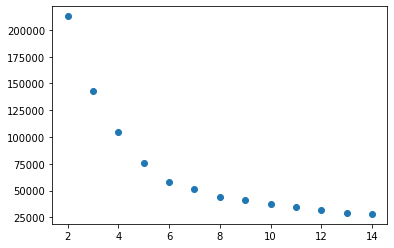

In [35]:
#Elbow method 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)

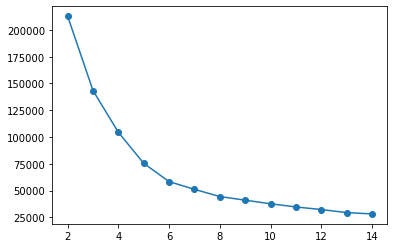

In [36]:
#graph with connecting points 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

In [37]:
# in above output graph at 5 location graph is decreasing so elbow or bend  is at 5 
# so we will select 5 number of clusers as optimum clusters 

2Cluster,Score0.293166070535953
3Cluster,Score0.3839349967742105
4Cluster,Score0.40546302077733304
5Cluster,Score0.44428597560893024
6Cluster,Score0.4523443947724053
7Cluster,Score0.4412807576186172
8Cluster,Score0.4280971079746162
9Cluster,Score0.40126260157691634
10Cluster,Score0.3790978814868016
11Cluster,Score0.3773045245801495
12Cluster,Score0.3533695974548904
13Cluster,Score0.34649030639881756
14Cluster,Score0.3485798986558785


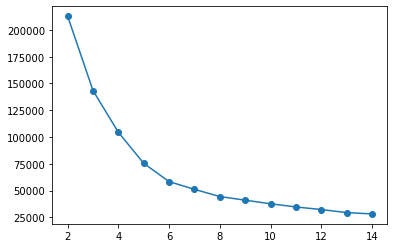

In [38]:
# show silhouette_score with cluster # from output we found that 5Cluster,Score0.553931997444648 is the maximum score 
# so we can finalize the cluster size =5 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
    y=demo_model.predict(X)
    print(f"{i}Cluster,Score{silhouette_score(X,y)}")
plt.scatter(k,sse)
plt.plot(k,sse)

In [39]:
import seaborn as sns